## World Happiness Report

Today I'm going to be playing around with the online data from the [2018 World Happiness Report](https://worldhappiness.report/ed/2018/). I'll do a little feature engineering but mostly explore different ways to look at the data, through correlations and measurement standardizations, as well as visualizations in matplotlib and seaborn. And because I find this data really interesting, I'll also talk about what we can learn from it on a non-technical level, as well as what the data does not - and cannot - tell us.

The primary sheet in the Excel document for the 2018 data has year-on-year measurements (~10 years) for each country in a multitude of measurements. The third sheet, however, simplifies things: It records the average scores for these measurements beween 2015 and 2017. That's a 3-year average, giving us a pretty solid snapshot for what these countries look like during a specific point in time.

Things I want to look at:
- Regional life ladder (happiness) scores, how each region's score distribution compares to one another
- Compare regional GDP measurements and life ladder scores 
- How each measurement value correlates to other measurements within regions

We can investigate these topics from multiple angles, using multiple tools. 

Let's begin!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
happy = pd.read_excel('world_happiness_original.xls', sheet_name='SupportingFactors')

In [3]:
happy.head()

,country,Region indicator,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017"
0,Afghanistan,South Asia,3.631519,0.042360,7.462610,1741.687500,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009
1,Albania,Central and Eastern Europe,4.586040,0.055813,9.338126,11363.095703,68.871552,0.639576,0.010078,0.726340,0.009421,0.259975,0.009048,0.886778,0.005775
2,Algeria,Middle East and North Africa,5.294638,0.057087,9.540703,13914.723633,65.604858,0.776977,0.011171,0.439177,0.019161,0.128988,0.012327,0.698343,0.019293
3,Angola,Sub-Saharan Africa,3.794838,0.079919,8.741957,6260.132812,52.460709,0.765275,0.015744,0.374173,0.018346,0.106829,0.011499,0.833540,0.016014
4,Argentina,Latin America and Caribbean,6.387958,0.049497,9.842001,18807.310547,67.398483,0.905565,0.006363,0.853390,0.007526,0.163174,0.007777,0.847882,0.006881


In [4]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 15 columns):
country                                                         156 non-null object
Region indicator                                                156 non-null object
Life ladder, 2015-2017                                          156 non-null float64
Standard error, life ladder, 2015-2017                          156 non-null float64
Log of GDP per person, 2015-2017                                152 non-null float64
GDP per person, 2015-2017                                       152 non-null float64
Healthy life expectancy, 2015-2017                              153 non-null float64
Social support, 2015-2017                                       155 non-null float64
Standard error, social support, 2015-2017                       155 non-null float64
Freedom to make life choices, 2015-2017                         155 non-null float64
Standard error, freedom to make life choices, 2

This dataframe we has two categorical columns: country and region. Otherwise, it has 3-year averages for Life Ladder and a number of (potentially) supporting or related factors. We aren't missing much data, so that's good.

If we're investigating the data by region, the first question is simple: How many countries are in each region?

In [5]:
happy['Region indicator'].value_counts()

Sub-Saharan Africa                    39
Latin America and Caribbean           22
Western Europe                        21
Middle East and North Africa          19
Central and Eastern Europe            17
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              6
North America and ANZ                  4
Name: Region indicator, dtype: int64

For the sake of not having numerous, sometimes small, regions, this dataset groups the countries into fewer regions than the UN geoscheme, which I use in a different notebook.  Deciding to sort the countries into fewer regions has particular consequences. For example, the Sub-Saharan Africa region is made up of 39 countries - almost double that of the next region (which, being all of Latin America and the Carribean, is also pretty expansive). Is it really wise to generalize measurements across the majority of Africa, or the entirety of South America, Central America, and the Caribbean? 

North America (USA and Canada) are grouped together with Australia and New Zealand since they are somewhat similar in economic and political measurements, but strong cultural differences remain.

Anyway, this is is how the people behind the Happiness Report decided to sort countries. We can investigate how similar or different countries are within each region later.

Looking at the list of regions, there's only one name that's unfamiliar. What countries are included in Commonwealth of Independent States? 

In [5]:
happy.set_index('Region indicator').loc['Commonwealth of Independent States']

,country,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017"
Region indicator,,,,,,,,,,,,,,
Commonwealth of Independent States,Armenia,4.320565,0.046600,9.018902,8257.704102,64.962479,0.710185,0.009443,0.592958,0.010661,0.122584,0.006905,0.895625,0.006379
Commonwealth of Independent States,Azerbaijan,5.200595,0.035345,9.685745,16086.653320,62.969749,0.779933,0.009029,0.735739,0.009759,0.104109,0.006177,0.620859,0.011189
Commonwealth of Independent States,Belarus,5.483326,0.037971,9.733157,16867.722656,66.030510,0.917586,0.005753,0.632647,0.010506,0.217487,0.008474,0.661702,0.010528
Commonwealth of Independent States,Georgia,4.340491,0.043077,9.137403,9296.585938,64.219757,0.547448,0.011062,0.689985,0.010680,0.072006,0.005383,0.550257,0.012645
Commonwealth of Independent States,Kazakhstan,5.790053,0.041204,10.066662,23544.835938,63.864944,0.925234,0.005571,0.755724,0.009287,0.314800,0.009803,0.723838,0.009999
Commonwealth of Independent States,Kyrgyzstan,5.130754,0.043856,8.097990,3287.853027,62.680176,0.884335,0.007021,0.828307,0.008586,0.368076,0.010760,0.882820,0.006844
Commonwealth of Independent States,Moldova,5.639724,0.036668,8.505744,4943.080566,63.515663,0.837060,0.007460,0.569458,0.010281,0.228209,0.008442,0.946052,0.004066
Commonwealth of Independent States,Russia,5.809671,0.033628,10.093880,24194.478516,62.832916,0.909936,0.004749,0.710038,0.007592,0.188828,0.006023,0.899818,0.004798
Commonwealth of Independent States,Tajikistan,5.352530,0.041347,7.919712,2750.977539,62.812145,0.787323,0.008764,0.797694,0.008961,0.250162,0.009012,0.696459,0.010206


Ah, this is North and West Asia, including the Caucasus region. The region name is a post-Soviet designation, which I'd have known if [I had looked it up first](https://www.nti.org/learn/treaties-and-regimes/commonwealth-independent-states-cis/).

### Comparing Life Ladder scores across regions

Despite potential concerns about the regions, it's a convenient metric for comparison. Let's group the data by region and see what the mean scores look like.

In [7]:
happy.groupby('Region indicator').mean()

,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017"
Region indicator,,,,,,,,,,,,,
Central and Eastern Europe,5.629809,0.044658,9.887390,21090.603745,67.503840,0.853699,0.007249,0.718298,0.009609,0.256865,0.008983,0.869311,0.006752
Commonwealth of Independent States,5.241908,0.040608,9.130607,11548.644002,63.362464,0.838901,0.007177,0.710971,0.009228,0.250593,0.008508,0.751998,0.008970
East Asia,5.671889,0.040340,10.166842,30745.966016,70.273793,0.853866,0.007123,0.757025,0.009490,0.342026,0.009582,0.724358,0.008853
Latin America and Caribbean,5.950038,0.063470,9.291384,12837.754822,64.543706,0.851228,0.009000,0.799352,0.010155,0.244472,0.011175,0.804702,0.009013
Middle East and North Africa,5.294109,0.055299,9.816468,29130.971327,64.533431,0.763783,0.009370,0.694397,0.010289,0.276863,0.009041,0.767852,0.010781
North America and ANZ,7.202595,0.043870,10.681645,44026.702148,71.545143,0.936441,0.006050,0.903215,0.008989,0.649379,0.012721,0.431851,0.012411
South Asia,4.603908,0.046270,8.405348,5364.792829,59.637658,0.703719,0.010049,0.757572,0.009466,0.336217,0.010691,0.765899,0.009266
Southeast Asia,5.313452,0.052302,9.268224,17896.457709,63.045044,0.819254,0.009736,0.871981,0.009054,0.510458,0.011694,0.707862,0.010728
Sub-Saharan Africa,4.195002,0.062131,7.856636,4019.631079,52.198854,0.692852,0.011103,0.705915,0.011006,0.182426,0.008956,0.779073,0.009463


Looking at the the mean scores, it's hard to see much. The Life Ladder scores are similar.. but what does that mean? Let's see what the scores look like when we visualize them.

### Distribution of Life Ladder scores

As the above groupby indicates, the mean Life Ladder scores of each region aren't so different. However, this might be covering up some interesting information about the *distribution* of these scores - that is, how they vary between individual countries within a particular region. For that, let's look at a box plot!

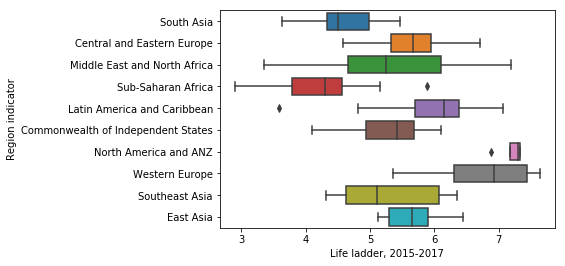

In [8]:
sns.boxplot(x='Life ladder, 2015-2017', y='Region indicator', data=happy)

That gives us a pretty good idea of things. The Life Ladder scores in Middle Eastern and North African countries are pretty spread out, just as they are in Southeast Asia. Despite my above concerns about regions covering too many countries, countries in Sub-Saharan Africa and Latin America/Caribbean regions have fairly low variety - the scores are clustered pretty strongly around the mean.

I like how the North America/ANZ is very tight, but the dot on the left suggests that, of the four countries in this region, one is a huge outlier. I wonder if it's the USA? There's also an outlier in Sub-Saharan Africa (higher score than most - South Africa is my guess), and an outlier in Latin America/Caribbean (lower than most - maybe Venezuela?).

This box plot demonstrates why we can't just compare mean scores. When we did that, most of the regions looked pretty similar, but when we look at the distribution we can see that they have noticable differences.

### GDP

What do regional GDPs look like? Instead of looking at the dollar values for this, I want to turn the continuous variable into discrete bins. And since the range of the raw numbers is so large, I'm going to create bins from the Log of GDP column, which, as you might expect, takes the logarithm of these raw numbers to put them on a smaller scale.

In [6]:
# Look at the log GDP range

happy['Log of GDP per person, 2015-2017'].describe()

count    152.000000
mean       9.252586
std        1.212258
min        6.473706
25%        8.375262
50%        9.446833
75%       10.218333
max       11.693157
Name: Log of GDP per person, 2015-2017, dtype: float64

In [7]:
# Cut the log GDP values into 5 categories

happy['log GDP bins'] = pd.cut(happy['Log of GDP per person, 2015-2017'],
                              5, labels=['low', 'low-mid', 'mid', 'high-mid', 'high'],
                              include_lowest=True)

In [8]:
# Check the dataframe to make sure the new column is there

happy.head()

,country,Region indicator,"Life ladder, 2015-2017","Standard error, life ladder, 2015-2017","Log of GDP per person, 2015-2017","GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Standard error, social support, 2015-2017","Freedom to make life choices, 2015-2017","Standard error, freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Standard error, generosity, 2015-2017","Perceptions of corruption, 2015-2017","Standard error, perceptions of corruption, 2015-2017",log GDP bins
0,Afghanistan,South Asia,3.631519,0.042360,7.462610,1741.687500,52.013329,0.525075,0.011119,0.445294,0.011449,0.179054,0.008331,0.879705,0.006009,low
1,Albania,Central and Eastern Europe,4.586040,0.055813,9.338126,11363.095703,68.871552,0.639576,0.010078,0.726340,0.009421,0.259975,0.009048,0.886778,0.005775,mid
2,Algeria,Middle East and North Africa,5.294638,0.057087,9.540703,13914.723633,65.604858,0.776977,0.011171,0.439177,0.019161,0.128988,0.012327,0.698343,0.019293,mid
3,Angola,Sub-Saharan Africa,3.794838,0.079919,8.741957,6260.132812,52.460709,0.765275,0.015744,0.374173,0.018346,0.106829,0.011499,0.833540,0.016014,mid
4,Argentina,Latin America and Caribbean,6.387958,0.049497,9.842001,18807.310547,67.398483,0.905565,0.006363,0.853390,0.007526,0.163174,0.007777,0.847882,0.006881,high-mid


In [9]:
# Check out the bin distribution

happy['log GDP bins'].value_counts(sort=False)

low         18
low-mid     25
mid         43
high-mid    46
high        20
Name: log GDP bins, dtype: int64

If we were to plot these values, we'd see a slight rightward skew. That makese sense - at this point in time, there are more rich countries than poor ones.

#### Distrubution of GDP

Are rich and poor countries evenly distributed across regions? We can easily find this out with a countplot.

Text(0,0.5,'Number of countries')

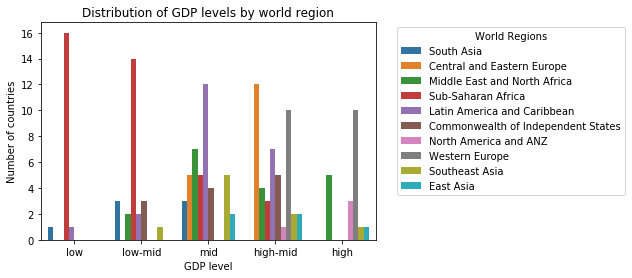

In [10]:
sns.countplot(x='log GDP bins', data=happy, hue='Region indicator')

plt.legend(bbox_to_anchor=(1.05, 1), title='World Regions')
plt.title('Distribution of GDP levels by world region')
plt.xlabel('GDP level')
plt.ylabel('Number of countries')

Unsurprisingly, it's primarily countries within the Sub-Saharan region with low and low-mid GDPs, while the higher GDP categories are populated with European counries and North America/ANZ mixed region. Latin American countries are primarily mid and mid-high, while countries in the Middle East and North Africa are well distributed at mid and above (with only two countries at the low-mid level).

While the countplot doesn't get too detailed, it's really useful for a general understanding of how GDP levels look across the world. What if we do this for Life Ladder scores?

### Distribution of Life Ladder Scores

In [12]:
# Separate raw scores into low-to-high bins

happy['ladder bin'] = pd.cut(happy['Life ladder, 2015-2017'], 5, 
                            labels=['low', 'low-mid', 'mid', 'high-mid',
                                   'high'], include_lowest=True)

In [13]:
# Check out the bin distribution

happy['ladder bin'].value_counts()

high-mid    41
mid         40
low-mid     38
high        21
low         16
Name: ladder bin, dtype: int64

Even more than the GDP, the Life Ladder distribution is heavily skewed rightward - countries are far more likely to have Life Ladder scores around the mean or above. But, again, is that evenly distributed across regions?

(0, 25)

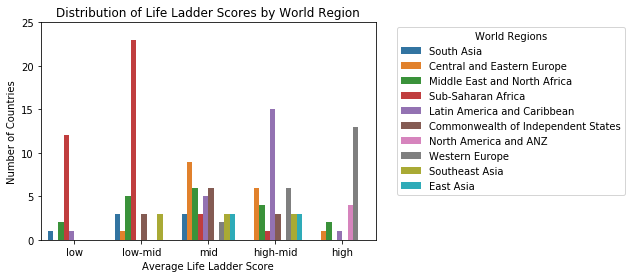

In [14]:
sns.countplot(x='ladder bin', data=happy, hue='Region indicator')

plt.legend(bbox_to_anchor=(1.05, 1), title='World Regions')
plt.title('Distribution of Life Ladder Scores by World Region')
plt.ylabel('Number of Countries')
plt.xlabel('Average Life Ladder Score')
plt.ylim(0,25)

There are definitely some similarities between the GDP and Life Ladder scores, although I can also spot a few differences - higher life ladder scores in Latin America and Caribbean despite generally mid-level GDP. And a more even distribution of life ladder scores across Middle East and North Africa despite a slightly right-skew of GDP distribution. 

We need to keep in mind, however, that these two plots are on different scales - the y-axis goes up to 20 for the GDP plot, 25 for the Life Ladder. To fix this, we can adjust the limits.

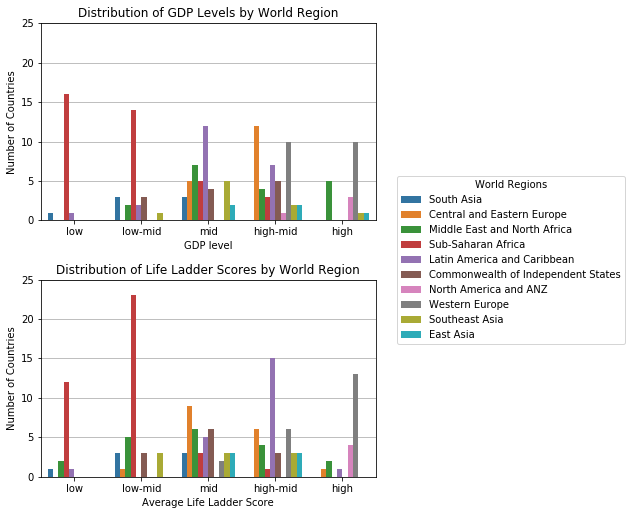

In [97]:
fig = plt.figure()
plt.subplots_adjust(top=1.7, hspace=0.3)

ax1 = fig.add_subplot(211)
ax1 = sns.countplot(x='log GDP bins', data=happy, hue='Region indicator')
ax1.legend(bbox_to_anchor=(1.05, 0.25), title='World Regions')
ax1.set_title('Distribution of GDP Levels by World Region')
ax1.set_xlabel('GDP level')
ax1.set_ylabel('Number of Countries')
ax1.set_ylim(0, 25)
ax1.yaxis.grid(True)
ax1.set_axisbelow(True)

ax2 = fig.add_subplot(212)
ax2 = sns.countplot(x='ladder bin', data=happy, hue='Region indicator')
ax2.get_legend().remove()
ax2.set_title('Distribution of Life Ladder Scores by World Region')
ax2.set_ylabel('Number of Countries')
ax2.set_xlabel('Average Life Ladder Score')
ax2.set_ylim(0,25)
ax2.yaxis.grid(True)
ax2.set_axisbelow(True)

What does this show us? The most visible difference is Sub-Saharan Africa - the vast majority of these countries have low-mid Life Ladder scores, despite having more countries with low GDPs. Also notable is Latin America and the Caribbean - despite most countries having a mid-level GDP, more countries in this region have high-mid Life Ladder scores. Other regions, however, have higher GDPs than Life Ladder scores, such as Central and Eastern Europe and Middle East/North Africa.

As I said above, we can't draw any conclusions with these plots, but they are a good starting place for discussion. Which Latin American countries have the highest Life Ladder scores? Why do no East Asian countries have Life Ladder scores in the highest bin? Although this plot - and this data more generally - doesn't answer such questions, it can inspire a deeper look into a number of topics.

### Correlation of variables within each region

How do the measurements correlate with each other? Do they correlate to the same extent and in the same way across regions?

Before we do this, let's clean up the dataframe a bit. We don't need to find correlations between standard deviations, for example. Let's create a new dataframe without the calculation columns or the bins we created in the above exercise.

In [17]:
happy.columns

Index(['country', 'Region indicator', 'Life ladder, 2015-2017',
       'Standard error, life ladder, 2015-2017',
       'Log of GDP per person, 2015-2017', 'GDP per person, 2015-2017',
       'Healthy life expectancy, 2015-2017', 'Social support, 2015-2017',
       'Standard error, social support, 2015-2017',
       'Freedom to make life choices, 2015-2017',
       'Standard error, freedom to make life choices, 2015-2017',
       'Generosity, 2015-2017, without adjustment for GDP per person',
       'Standard error, generosity, 2015-2017',
       'Perceptions of corruption, 2015-2017',
       'Standard error, perceptions of corruption, 2015-2017', 'log GDP bins',
       'ladder bin'],
      dtype='object')

In [18]:
happy2 = happy.drop(['Standard error, life ladder, 2015-2017', 
                    'GDP per person, 2015-2017',
                    'Standard error, social support, 2015-2017',
                    'Standard error, freedom to make life choices, 2015-2017',
                    'Standard error, generosity, 2015-2017',
                    'Standard error, perceptions of corruption, 2015-2017', 
                     'log GDP bins', 'ladder bin'], axis=1)

I want to look at how the these measurements correlate with each other within each region of Asia (I'm considering the Commonwealth of Independent States to be West Asia, although West Asia also includes some of the Middle East - and some of the countries in CIS are actually central Asia).

Because we're going to look the same metrics in four different circumstances, we can create a function to reuse.

In [19]:
# Create correlation matrix with data only from specified region

def regional_df_correlation(region):
    new_df = happy2.set_index('Region indicator').loc[region].\
    reset_index().drop('Region indicator', axis=1)
    return new_df.corr()

In [20]:
# Create four matrices, one for each Asian region

south_asia = regional_df_correlation('South Asia')
southeast_asia = regional_df_correlation('Southeast Asia')
east_asia = regional_df_correlation('East Asia')
west_asia = regional_df_correlation('Commonwealth of Independent States')

In [21]:
south_asia

,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
"Life ladder, 2015-2017",1.000000,0.352094,0.356624,0.511561,0.374770,0.477105,-0.601009
"Log of GDP per person, 2015-2017",0.352094,1.000000,0.658888,0.569782,0.611167,0.684931,-0.268909
"Healthy life expectancy, 2015-2017",0.356624,0.658888,1.000000,0.768391,0.933738,0.551265,-0.275619
"Social support, 2015-2017",0.511561,0.569782,0.768391,1.000000,0.690534,0.912410,-0.269186
"Freedom to make life choices, 2015-2017",0.374770,0.611167,0.933738,0.690534,1.000000,0.465893,-0.464746
"Generosity, 2015-2017, without adjustment for GDP per person",0.477105,0.684931,0.551265,0.912410,0.465893,1.000000,-0.199880
"Perceptions of corruption, 2015-2017",-0.601009,-0.268909,-0.275619,-0.269186,-0.464746,-0.199880,1.000000


In [22]:
southeast_asia

,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
"Life ladder, 2015-2017",1.000000,0.866611,0.801612,0.774424,-0.397570,0.006476,-0.229927
"Log of GDP per person, 2015-2017",0.866611,1.000000,0.873011,0.667412,-0.348185,0.287974,-0.588977
"Healthy life expectancy, 2015-2017",0.801612,0.873011,1.000000,0.833776,-0.076419,0.028717,-0.580129
"Social support, 2015-2017",0.774424,0.667412,0.833776,1.000000,-0.014860,0.010319,-0.272578
"Freedom to make life choices, 2015-2017",-0.397570,-0.348185,-0.076419,-0.014860,1.000000,-0.381035,-0.211777
"Generosity, 2015-2017, without adjustment for GDP per person",0.006476,0.287974,0.028717,0.010319,-0.381035,1.000000,-0.098232
"Perceptions of corruption, 2015-2017",-0.229927,-0.588977,-0.580129,-0.272578,-0.211777,-0.098232,1.000000


In [23]:
east_asia

,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
"Life ladder, 2015-2017",1.000000,0.698870,0.669928,0.199441,-0.286617,0.068079,0.152334
"Log of GDP per person, 2015-2017",0.698870,1.000000,0.940019,-0.138862,-0.019071,0.434613,-0.763307
"Healthy life expectancy, 2015-2017",0.669928,0.940019,1.000000,-0.314680,-0.006374,-0.224873,-0.683104
"Social support, 2015-2017",0.199441,-0.138862,-0.314680,1.000000,-0.052725,0.329508,0.281195
"Freedom to make life choices, 2015-2017",-0.286617,-0.019071,-0.006374,-0.052725,1.000000,-0.478803,-0.700180
"Generosity, 2015-2017, without adjustment for GDP per person",0.068079,0.434613,-0.224873,0.329508,-0.478803,1.000000,-0.419974
"Perceptions of corruption, 2015-2017",0.152334,-0.763307,-0.683104,0.281195,-0.700180,-0.419974,1.000000


In [24]:
west_asia

,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
"Life ladder, 2015-2017",1.000000,0.202824,-0.279544,0.665381,0.586095,0.520116,-0.250609
"Log of GDP per person, 2015-2017",0.202824,1.000000,0.087498,0.195705,-0.183306,-0.248796,-0.104180
"Healthy life expectancy, 2015-2017",-0.279544,0.087498,1.000000,-0.305629,-0.328132,-0.444566,-0.110000
"Social support, 2015-2017",0.665381,0.195705,-0.305629,1.000000,0.255729,0.762976,0.164938
"Freedom to make life choices, 2015-2017",0.586095,-0.183306,-0.328132,0.255729,1.000000,0.561582,-0.624587
"Generosity, 2015-2017, without adjustment for GDP per person",0.520116,-0.248796,-0.444566,0.762976,0.561582,1.000000,-0.100534
"Perceptions of corruption, 2015-2017",-0.250609,-0.104180,-0.110000,0.164938,-0.624587,-0.100534,1.000000


Done! We now have four different correlation matrices. However, it's pretty hard to compare them to one another. Just as dataframes. Let's make a 2x2 plot of heatmaps!

Text(0.5,1,'West Asia')

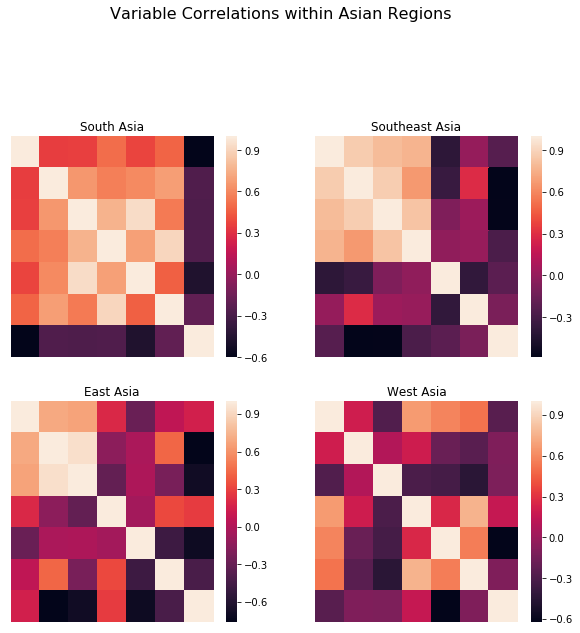

In [29]:
fig = plt.figure(figsize = [10, 10])
fig.suptitle('Variable Correlations within Asian Regions', fontsize = 16)
fig.subplots_adjust(top=0.80)

ax1 = fig.add_subplot(221)
ax1 = sns.heatmap(south_asia, xticklabels=0, yticklabels=0)
ax1.set_title(label='South Asia')

ax2 = fig.add_subplot(222)
ax2 = sns.heatmap(southeast_asia, xticklabels=0, yticklabels=0)
ax2.set_title(label='Southeast Asia')

ax3 = fig.add_subplot(223)
ax3 = sns.heatmap(east_asia, xticklabels=0, yticklabels=0)
ax3.set_title(label='East Asia')

ax4 = fig.add_subplot(224)
ax4 = sns.heatmap(west_asia, xticklabels=0, yticklabels=0)
ax4.set_title(label='West Asia')

I took away the variable/column names because they made the figure too chaotic, but just by looking at the patterns we can see that the regions have very different correlation patterns. In Southeast Asia, most variables are pretty strongly correlated, whether negatively (perceptions of corruption) or positively (everything else). East Asia has a few variables strongly correlated (you can tell by the lightly colored boxes in the upper-left corner), but otherwise not. That'd be **Life Ladder**, **GDP**, and **Healthy Life Expectancy**. it makes a lot of sense why these would be correlated - I'd say it's more interesting where this is **not** the case.

But then again, East Asia only has 6 countries in it, and I wager that they're all somewhat similar in GDP. It's probably more difficult to make those generalizations with, say, Western Asia countries. Also, while the latter countries are all known as a "commonwealth", it's possible they don't share the same background or history or ideologoy, at least not to the extent of SE Asian or East Asian countries.

### Central & Eastern Europe

How do these countries compare to one another? Instead of running a correlation, let's look at the scores themselves.

In [32]:
# Create dataframe with data just from central and eastern European countries 

c_europe = happy2.set_index('Region indicator').loc['Central and Eastern Europe'].reset_index().drop('Region indicator', axis=1)

In [31]:
c_europe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 8 columns):
country                                                         17 non-null object
Life ladder, 2015-2017                                          17 non-null float64
Log of GDP per person, 2015-2017                                17 non-null float64
Healthy life expectancy, 2015-2017                              16 non-null float64
Social support, 2015-2017                                       17 non-null float64
Freedom to make life choices, 2015-2017                         17 non-null float64
Generosity, 2015-2017, without adjustment for GDP per person    17 non-null float64
Perceptions of corruption, 2015-2017                            17 non-null float64
dtypes: float64(7), object(1)
memory usage: 1.1+ KB


In [33]:
# Set index as countries

c_europe.groupby('country').mean()

,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
country,,,,,,,
Albania,4.586040,9.338126,68.871552,0.639576,0.726340,0.259975,0.886778
Bosnia and Herzegovina,5.129354,9.335348,67.838272,0.746083,0.609957,0.363587,0.946653
Bulgaria,4.933125,9.783442,66.415489,0.924724,0.675945,0.162423,0.929408
Croatia,5.321210,9.977691,67.191742,0.779966,0.694128,0.264015,0.874757
Czech Republic,6.710905,10.358431,70.876122,0.914136,0.830621,0.206806,0.884561
Estonia,5.739222,10.251013,67.199562,0.931745,0.839160,0.232369,0.625704
Hungary,5.619982,10.157919,67.019539,0.878177,0.592040,0.186148,0.905561
Kosovo,5.662149,9.142283,NaN,0.808085,0.751153,0.429290,0.904268
Latvia,5.933086,10.083947,65.109261,0.899832,0.679467,0.228871,0.824203


In order to reset the index, we could have just used `set_index()`, but `groupby()` is identical here.

Most of the data is present, although we're missing a healthy life expectancy for Kosovo. We'll just have to remember to drop the null values when we run analyses. Or not use Kosovo at all.

Visuaizing all of this data would be pretty messy - there are a lot of countries. Let's sort the countries by GDP and take the top three and bottom three, excluding Kosovo.

In [35]:
# Sort countries by GDP

c_europe.sort_values('Log of GDP per person, 2015-2017')

,country,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
7,Kosovo,5.662149,9.142283,NaN,0.808085,0.751153,0.429290,0.904268
1,Bosnia and Herzegovina,5.129354,9.335348,67.838272,0.746083,0.609957,0.363587,0.946653
0,Albania,4.586040,9.338126,68.871552,0.639576,0.726340,0.259975,0.886778
10,Macedonia,5.184806,9.478037,65.730431,0.811982,0.706000,0.307579,0.849812
14,Serbia,5.398180,9.527346,65.553650,0.865078,0.616314,0.250890,0.867465
11,Montenegro,5.347548,9.664099,66.946114,0.828356,0.592260,0.225287,0.796306
2,Bulgaria,4.933125,9.783442,66.415489,0.924724,0.675945,0.162423,0.929408
3,Croatia,5.321210,9.977691,67.191742,0.779966,0.694128,0.264015,0.874757
13,Romania,5.945212,9.979953,66.857086,0.803613,0.817902,0.214329,0.945375
8,Latvia,5.933086,10.083947,65.109261,0.899832,0.679467,0.228871,0.824203


In [36]:
# Create new dataframe with six countries

c_europe_6 = c_europe.iloc[[1, 0, 10, 15, 16, 4]].set_index('country')

c_europe_6

,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
country,,,,,,,
Bosnia and Herzegovina,5.129354,9.335348,67.838272,0.746083,0.609957,0.363587,0.946653
Albania,4.586040,9.338126,68.871552,0.639576,0.726340,0.259975,0.886778
Macedonia,5.184806,9.478037,65.730431,0.811982,0.706000,0.307579,0.849812
Slovakia,6.173422,10.282703,68.423141,0.933639,0.671541,0.285166,0.921141
Slovenia,5.947598,10.312103,70.943291,0.921112,0.906564,0.351248,0.852600
Czech Republic,6.710905,10.358431,70.876122,0.914136,0.830621,0.206806,0.884561


Here's the data for the six countries we're looking at. We can't actually compare anything yet - because all of the measurements come from different studies, they're using vastly different scales. 

Luckily, we can use `StandardScaler` to standardize all of the measurements.

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
from sklearn_pandas import DataFrameMapper

In [39]:
mapper = DataFrameMapper([(c_europe_6.columns, StandardScaler())])
scaled_features = mapper.fit_transform(c_europe_6.copy(), 4)
scaled_features_df = pd.DataFrame(scaled_features, index=c_europe_6.index, 
                                  columns=c_europe_6.columns)

In [40]:
scaled_features_df.reset_index(inplace=True)

In [41]:
scaled_features_df

,country,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
0,Bosnia and Herzegovina,-0.685092,-1.097057,-0.524035,-0.757655,-1.331336,1.270220,1.624305
1,Albania,-1.440613,-1.091145,0.050659,-1.745701,-0.156442,-0.669203,-0.100204
2,Macedonia,-0.607981,-0.793362,-1.696386,-0.146324,-0.361774,0.221851,-1.164922
3,Slovakia,0.766767,0.919271,-0.198740,0.982272,-0.709640,-0.197682,0.889511
4,Slovenia,0.452740,0.981845,1.202930,0.866061,1.662916,1.039254,-1.084618
5,Czech Republic,1.514179,1.080448,1.165572,0.801346,0.896277,-1.664441,-0.164072


Now that all of the measurments are on the same scale, let's throw them up on a plot.

In [42]:
x = scaled_features_df['country']

y = scaled_features_df[['Life ladder, 2015-2017', 'Log of GDP per person, 2015-2017',
                       'Healthy life expectancy, 2015-2017', 
                        'Freedom to make life choices, 2015-2017',
                       'Perceptions of corruption, 2015-2017']]

Text(0.5,1,'Scaled Measurements Across 6 Countries in Central & Eastern Europe')

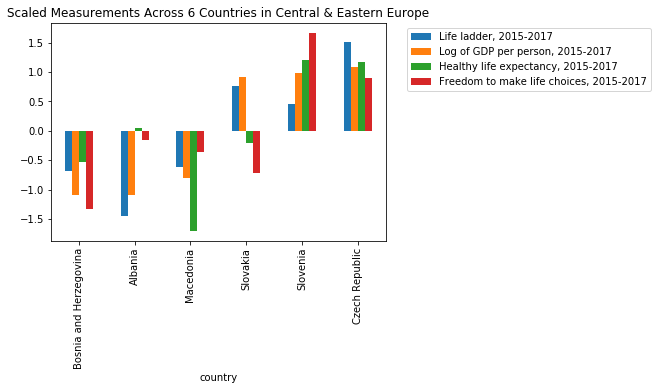

In [103]:
scaled_features_df[['country', 'Life ladder, 2015-2017',
                   'Log of GDP per person, 2015-2017',
                    'Healthy life expectancy, 2015-2017',
                   'Freedom to make life choices, 2015-2017']].plot.bar(x = 'country')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.title('Scaled Measurements Across 6 Countries in Central & Eastern Europe', wrap=True)

These are all pretty interesting, both in how each variable stacks up against one another within a country, and how this correlation changes between countries. Life Ladder scores and GDP are pretty tightly correlated in all 6 countries, which the others have a bit more variation.

### North America, Australia, New Zealand

Because they don't have many neighboring countries, researchers lumped Canada, United States, Australia, and New Zealand together in one regional category. Was this a good idea? How similar are these countries, really?

In [44]:
# Create new dataframe with North America and ANZ data

na_anz = happy2.set_index('Region indicator').loc['North America and ANZ'].reset_index().drop('Region indicator', axis=1)

In [45]:
na_anz

,country,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
0,Australia,7.272051,10.700419,72.650299,0.948141,0.918004,0.694879,0.388529
1,Canada,7.328528,10.669782,72.190804,0.931540,0.923506,0.625681,0.409656
2,New Zealand,7.323762,10.469387,71.568550,0.959619,0.936796,0.682525,0.228877
3,United States,6.886040,10.886992,69.770920,0.906464,0.834554,0.594430,0.700341


Huh. We don't even to chart the differences here - the dataframe makes it pretty obvious. Despite a higher GDP than the other countries, the US has lower scores on all metrics other than Perceptions of Corruption, where it has a significantly higher score.

Is this really a question of the US being a complete outlier, though? There are plenty of demographic details that are not accounted for in this dataset. For example, the United State's low scores might be due to its large population. After all, the country has almost 10x as many people than the second largest country on that list, Canada.

We could add a new column with the population metrics for each country - average population from 2015-2017 - but even then I think we'd be hard pressed to find many conclusions for the US. The only countries larger than the US are China and India, which both have populations over a billion. Besides, the other demographic aspects of those countries would make it pretty hard to draw conclusions about large countries in general.

Still, since we have the data at hand, let's see how the largest countries compare to each other.

In [46]:
# Countries with populations larger than 200 million in 2018

large_country_list = ['China', 'India', 'United States', 'Indonesia', 'Brazil', 
                  'Pakistan', 'Nigeria']

In [47]:
happy2.set_index('country').loc[large_country_list]

,Region indicator,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
country,,,,,,,,
China,East Asia,5.245798,9.574296,69.155304,0.772204,0.876166,0.091700,NaN
India,South Asia,4.189812,8.713384,59.257374,0.610866,0.827820,0.246471,0.774644
United States,North America and ANZ,6.886040,10.886992,69.770920,0.906464,0.834554,0.594430,0.700341
Indonesia,Southeast Asia,5.092578,9.284377,60.436489,0.801869,0.826849,0.775616,0.914106
Brazil,Latin America and Caribbean,6.418890,9.563309,65.244133,0.908002,0.789254,0.217360,0.784573
Pakistan,South Asia,5.472466,8.492357,57.331608,0.636364,0.655410,0.298180,0.737520
Nigeria,Sub-Saharan Africa,5.155353,8.610160,45.496490,0.784354,0.762668,0.284791,0.888043


Compared to other large countries, United States doesn't look so bad! How do the variables compare to each other when we scale them?

In [48]:
large_countries = happy2.set_index('country').loc[large_country_list]

In [49]:
# Drop the region indicator column
# We also have to drop the corruption column; can't standardize with a null value (China)

large_countries.drop(['Region indicator', 'Perceptions of corruption, 2015-2017'], axis=1, inplace=True)

In [50]:
large_countries

,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person"
country,,,,,,
China,5.245798,9.574296,69.155304,0.772204,0.876166,0.091700
India,4.189812,8.713384,59.257374,0.610866,0.827820,0.246471
United States,6.886040,10.886992,69.770920,0.906464,0.834554,0.594430
Indonesia,5.092578,9.284377,60.436489,0.801869,0.826849,0.775616
Brazil,6.418890,9.563309,65.244133,0.908002,0.789254,0.217360
Pakistan,5.472466,8.492357,57.331608,0.636364,0.655410,0.298180
Nigeria,5.155353,8.610160,45.496490,0.784354,0.762668,0.284791


In [51]:
mapper = DataFrameMapper([(large_countries.columns, StandardScaler())])

In [52]:
large_scaled = mapper.fit_transform(large_countries.copy(), 4)

In [53]:
large_scaled_df = pd.DataFrame(large_scaled, index=large_countries.index, 
                                  columns=large_countries.columns)

In [54]:
large_scaled_df.reset_index(inplace=True)

In [55]:
x = large_scaled_df['country']

y = large_scaled_df.drop('country', axis=1)

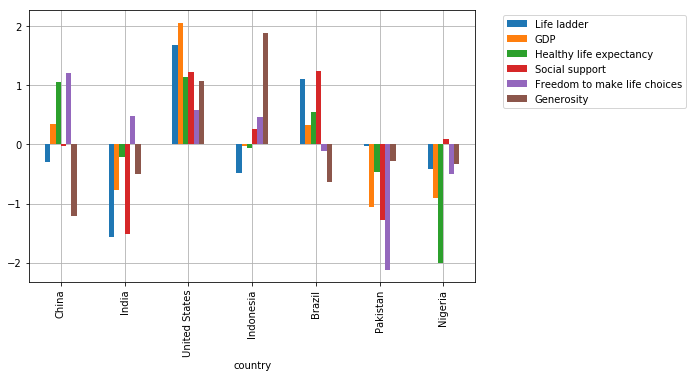

In [95]:
fig = large_scaled_df.plot.bar(x = 'country', figsize=[8, 5])
fig.legend(bbox_to_anchor=(1.05, 1), labels=['Life ladder', 'GDP', 'Healthy life expectancy',
                                            'Social support', 'Freedom to make life choices',
                                            'Generosity'])
fig.grid(True, which='both')
fig.set_axisbelow(True)

As suspected - these countries are wildly different from one another in most metrics. Brazil, the second largest democracy in the world, has somewhat similar scores to the US. So maybe the US isn't that much of an outlier after all.

The next largest Western country is Germany, which has a much higher life ladder score than the US. On first glance, you might think this disproves the large population/lower Life Ladder score hypothesis, but although Germany has the largest population in Western Europe, that's only 82 million citizens - about a quarter of the US population. 

### Western Europe

How do the measurements in Western Europe look? These countries have pretty high scores in most variables, although there's probably some spread. It's 21 countries, after all.

In [104]:
west_europe = happy2.set_index('Region indicator').loc['Western Europe'].reset_index().drop('Region indicator', axis=1)

In [105]:
# Organize Western Europe countries by Life Ladder and GDP

west_europe.sort_values('Life ladder, 2015-2017', ascending=False)

,country,"Life ladder, 2015-2017","Log of GDP per person, 2015-2017","Healthy life expectancy, 2015-2017","Social support, 2015-2017","Freedom to make life choices, 2015-2017","Generosity, 2015-2017, without adjustment for GDP per person","Perceptions of corruption, 2015-2017"
4,Finland,7.632102,10.588473,71.517502,0.956149,0.946694,0.421381,0.221270
15,Norway,7.593715,11.071932,71.086586,0.952147,0.951561,0.625537,0.319610
3,Denmark,7.555278,10.736396,71.312271,0.955462,0.948895,0.579054,0.193662
8,Iceland,7.495226,10.711179,72.755981,0.977497,0.943219,0.684818,0.691878
19,Switzerland,7.487312,10.956634,73.173759,0.938523,0.929152,0.549967,0.288248
13,Netherlands,7.441339,10.767729,71.619995,0.913711,0.910887,0.656769,0.402849
18,Sweden,7.314524,10.750161,72.745270,0.919106,0.928837,0.580782,0.239266
0,Austria,7.139362,10.704917,72.049568,0.920177,0.893372,0.509860,0.533494
9,Ireland,6.977095,11.046095,71.575157,0.952268,0.890615,0.636514,0.382129
6,Germany,6.964747,10.699355,71.079102,0.908021,0.867222,0.558220,0.430079


Today in **News That Surprises No One**, it turns out that Nordic countries (plus Switzerland and Netherlands) are the happiest countries in Western Europe (and the whole world). They're rich, homogeneous, and pretty damn small. 

### Concluding Remarks

What do we take away from all this? Unless you can control for all important factors (and what makes a factor important?), it's near impossible to say with any certainty what impacts happiness scores.

We saw that GDP generally tracks with happiness scores, although this isn't a strong relationship (or even strictly true) in every country. When compared to other rich countries, the United States doesn't look great - on any measurement - but when compared to other large countries, it's a shining star. 

The dataset may have flaws, but all datasets do. Even so, this data allows us to make a number of internesting visualizations and comparisons, which can spark conversation and lead to a deeper understanding of our world.